## Zad 1.
Zaimplementuj **algorytm Gradient Descent** do minimalizacji funkcji kwadratowej $f(x) = x^2 + 5x + 6$ tzn. znajdź minimum tej funkcji za pomocą gradient descent. Użyj różnych wartości hiperparametrów:
- współczynnik uczenia (learning rate),
- liczbę epok,
- punkt poczatkowy.

Przedstaw etapy optymalizacji na wykresie.

Epoka 0: x = 7.5000, f(x) = 99.7500, gradient = 25.0000
Epoka 10: x = -1.4263, f(x) = 0.9029, gradient = 2.6844
Epoka 20: x = -2.3847, f(x) = -0.2367, gradient = 0.2882
Epoka 30: x = -2.4876, f(x) = -0.2498, gradient = 0.0309
Epoka 40: x = -2.4987, f(x) = -0.2500, gradient = 0.0033
Epoka 50: x = -2.4999, f(x) = -0.2500, gradient = 0.0004
Epoka 60: x = -2.5000, f(x) = -0.2500, gradient = 0.0000

Optymalne rozwiązanie: x = -2.499996
Wartość funkcji: f(x) = -0.250000
Prawdziwe minimum: x = -2.5


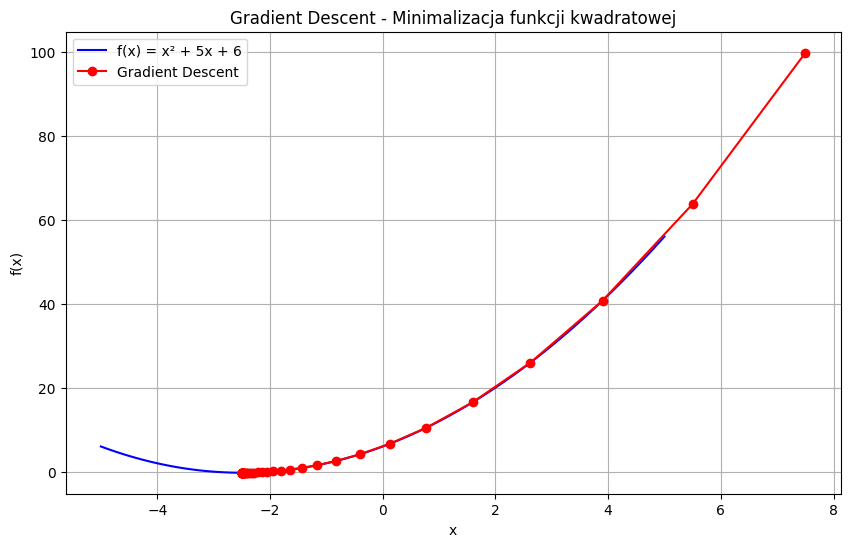

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Funkcja do minimalizacji
def f(x):
    ??

# Gradient funkcji
def grad_f(x):
    ??

# Parametry algorytmu
learning_rate = ??
epochs = ??
x = 10  # Punkt startowy
tolerance = 1e-6

# Historia wartości do wizualizacji
history = []

# Algorytm Gradient Descent
for epoch in range(epochs):
    ??

print(f"\nOptymalne rozwiązanie: x = {x:.6f}")
print(f"Wartość funkcji: f(x) = {f(x):.6f}")
print(f"Prawdziwe minimum: x = {-2.5}")

# Wizualizacja funkcji 
x_vals = ??
y_vals = ??

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', label='f(x) = x² + 5x + 6')
plt.plot(??, ??, 'ro-', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent - Minimalizacja funkcji kwadratowej')
plt.legend()
plt.grid(True)
plt.show()

### Zad 2.
Zaimplementuj optymalizację parametrów modelu liniowego $Y = AX + m$ za pomocą Gradient Descent wykorzystując bibliotekę *numpy*, gdzie
```Python
import numpy as np
from scipy.linalg import sqrtm

k, d = 3, 3
        
m_true = np.array([1.0, -2.0, 0.5])
        
Sigma_true = np.array([
    [2.0, 0.5, 0.3],
    [0.5, 1.5, -0.2],
    [0.3, -0.2, 1.0]
])
        
# Znajdowanie A takie że AAᵀ = Σ
try:
    A_true = np.linalg.cholesky(Sigma_true)
except np.linalg.LinAlgError:
    # Jeśli Cholesky nie działa, użyj pierwiastka macierzowego
    A_true = sqrtm(Sigma_true)
```

In [ ]:
import numpy as np
from scipy.linalg import sqrtm

np.random.seed(42)

def negative_log_likelihood(Y, A, m):
    """
    Oblicza negatywną log-wiarygodność
    
    L(A, m) = n*d/2 log(2π) + n/2 log|AAᵀ| + 1/2 ∑ (yᵢ - m)ᵀ(AAᵀ)⁻¹(yᵢ - m)
    """
    ??


def compute_gradients_analytical(Y, A, m):
    """
    Oblicza gradienty analitycznie względem A i m
    """
    
    
    # Gradient względem m
    # ∂L/∂m = ...
    grad_m = ??
    
    # Gradient względem A
    # ∂L/∂A = ...
    grad_A = ??
    
    return grad_A, grad_m



k, d = 3, 3
        
m_true = np.array([1.0, -2.0, 0.5])
        
Sigma_true = np.array([
    [2.0, 0.5, 0.3],
    [0.5, 1.5, -0.2],
    [0.3, -0.2, 1.0]
])
        
# Znajdowanie A takie że AAᵀ = Σ
# Używamy rozkładu Cholesky'ego
try:
    A_true = np.linalg.cholesky(Sigma_true)
except np.linalg.LinAlgError:
    # Jeśli Cholesky nie działa, użyj pierwiastka macierzowego
    A_true = sqrtm(Sigma_true)

A_true = A_true[:, :k]
Sigma_true = A_true @ A_true.T


n_samples = 1000

learning_rate_A = ??
learning_rate_m = ??
epochs=??
tolerance=1e-6


X = np.random.randn(n_samples, k)
Y = X @ A_true.T + m_true

# # Dodanie szumu dla stabilności numerycznej
Y += np.random.randn(n_samples, d) * 0.001
        
# Losowa inicjalizacja A (d x k)
A = ??
        
# Inicjalizacja m jako średnia z danych
m = ??


# Historia do śledzenia zbieżności
history = {
    'loss': [],
    'A': [],
    'm': [],
    'Sigma_norm_diff': [],
    'm_norm_diff': []
}

for epoch in range(epochs):
    # Obliczenie funkcji straty
    loss = ??
    
    # Obliczenie gradientów
    grad_A, grad_m = ??
    
    ...
    
    # Obliczenie różnic dla warunku stopu
    A_diff_norm = ??
    m_diff_norm = ??
    
    # Warunek stopu
    if A_diff_norm < tolerance and m_diff_norm < tolerance:
        print(f"Zbieżność osiągnięta w epoce {epoch}, {A_diff_norm=:.4g}, {m_diff_norm=:.4g}")
        break


    
Sigma_est = A @ A.T

print("\n" + "="*50)
print("PORÓWNANIE MACIERZY KOWARIANCJI")
print("="*50)

print("\nPrawdziwa macierz kowariancji Σ_true:")
print(Sigma_true)

print("\nEstymowana macierz kowariancji A_est @ A_est.T:")
print(Sigma_est)

print("\nRóżnica:")
print(Sigma_est - Sigma_true)

print(f"\nNorma różnicy: {np.linalg.norm(Sigma_est - Sigma_true):.6f}")

print("\nPorównanie wektorów średnich:")
print(f"m_true: {m_true}")
print(f"m_est:  {m}")
print(f"Różnica: {m - m_true}")
print(f"Norma różnicy: {np.linalg.norm(m - m_true):.6f}")

negative_log_likelihood(Y, A, m), negative_log_likelihood(Y, A_true, m_true)

Epoka 0: Loss = 712233.6140, ‖Σ_est - Σ_true‖ = 3.5851, ‖m_est - m_true‖ = 2.2733
Epoka 10000: Loss = 2509.7188, ‖Σ_est - Σ_true‖ = 3.2333, ‖m_est - m_true‖ = 1.7224
Epoka 20000: Loss = 2367.8710, ‖Σ_est - Σ_true‖ = 2.9383, ‖m_est - m_true‖ = 1.3695
Epoka 30000: Loss = 2250.9002, ‖Σ_est - Σ_true‖ = 2.3840, ‖m_est - m_true‖ = 1.0630
Epoka 40000: Loss = 2140.4092, ‖Σ_est - Σ_true‖ = 1.7241, ‖m_est - m_true‖ = 0.7879
Epoka 50000: Loss = 2040.5098, ‖Σ_est - Σ_true‖ = 1.0824, ‖m_est - m_true‖ = 0.5435
Epoka 60000: Loss = 1965.8919, ‖Σ_est - Σ_true‖ = 0.5785, ‖m_est - m_true‖ = 0.3410
Epoka 70000: Loss = 1926.9306, ‖Σ_est - Σ_true‖ = 0.2981, ‖m_est - m_true‖ = 0.1986
Epoka 80000: Loss = 1913.5497, ‖Σ_est - Σ_true‖ = 0.2149, ‖m_est - m_true‖ = 0.1244
Epoka 90000: Loss = 1910.0430, ‖Σ_est - Σ_true‖ = 0.2049, ‖m_est - m_true‖ = 0.1005
Epoka 100000: Loss = 1909.1908, ‖Σ_est - Σ_true‖ = 0.2050, ‖m_est - m_true‖ = 0.0969
Zbieżność osiągnięta w epoce 109651, A_diff_norm=1.152e-07, m_diff_norm=9.999

### Zad 3.
Podobnie jak w zadaniu 2, zaimplementuj optymalizację parametrów modelu gęstości Gaussa z **niskowymiarową reprezentacją macierzy kowariancji** przy użyciu rozkładu Cholesky'ego. Dane weściowe:
```Python
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
n_samples = 1000
n_dim = 5
rank = 2  # Niski rząd dla parametryzacji

# Prawdziwa macierz kowariancji o niskim rzędzie
A_true = np.random.randn(n_dim, rank) * 0.5
covariance_true = A_true @ A_true.T + np.eye(n_dim) * 0.1

mean_true = np.array([1.0, -1.0, 0.5, -0.5, 0.0])
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
n_samples = 1000
n_dim = 5
rank = 2  # Niski rząd dla parametryzacji

# Prawdziwa macierz kowariancji o niskim rzędzie
A_true = np.random.randn(n_dim, rank) * 0.5
covariance_true = A_true @ A_true.T + np.eye(n_dim) * 0.1

mean_true = np.array([1.0, -1.0, 0.5, -0.5, 0.0])

# Generowanie danych
X = ??

# Parametry modelu
mean = np.random.randn(n_dim)
sigma = 0.1
A = np.random.randn(n_dim, rank) * sigma  # Niskowymiarowa parametryzacja

# Funkcja gęstości prawdopodobieństwa
def log_likelihood(X, mean, L, sigma):
    ??
# Gradient log-wiarygodności
def compute_gradients(X, mean, L, sigma):
    ??


# Parametry optymalizacji
learning_rate_mean = ??
learning_rate_A = ??
learning_rate_sigma = ??
epochs = 1000

# Optymalizacja
for epoch in range(epochs):
    ??

# Ostateczna macierz kowariancji
covariance_est = ??

print(f"\nPrawdziwa średnia: {mean_true}")
print(f"Oszacowana średnia: {mean}")
print(f"\nNorma różnicy średnich: {np.linalg.norm(??):.6f}")
print(f"Norma różnicy kowariancji: {np.linalg.norm(??):.6f}")

print(f"\nTrue cov:\n{covariance_true}")
print(f"Estimation cov:\n{covariance_true}")

Epoka 0: Log-wiarygodność = -5732.0169
Epoka 50: Log-wiarygodność = -3422.3866
Epoka 100: Log-wiarygodność = -3407.9989
Epoka 150: Log-wiarygodność = -3403.6617
Epoka 200: Log-wiarygodność = -3402.4951
Epoka 250: Log-wiarygodność = -3402.2240
Epoka 300: Log-wiarygodność = -3402.1659
Epoka 350: Log-wiarygodność = -3402.1539
Epoka 400: Log-wiarygodność = -3402.1514
Epoka 450: Log-wiarygodność = -3402.1509
Epoka 500: Log-wiarygodność = -3402.1508
Epoka 550: Log-wiarygodność = -3402.1508
Epoka 600: Log-wiarygodność = -3402.1508
Epoka 650: Log-wiarygodność = -3402.1508
Epoka 700: Log-wiarygodność = -3402.1508
Epoka 750: Log-wiarygodność = -3402.1508
Epoka 800: Log-wiarygodność = -3402.1508
Epoka 850: Log-wiarygodność = -3402.1508
Epoka 900: Log-wiarygodność = -3402.1508
Epoka 950: Log-wiarygodność = -3402.1508

Prawdziwa średnia: [ 1.  -1.   0.5 -0.5  0. ]
Oszacowana średnia: [ 0.99502767 -0.99608248  0.49040049 -0.50383692  0.01069463]

Norma różnicy średnich: 0.016165
Norma różnicy kowari

### Zad 4.
Zaimplementuj algorytm *ADAM* (Adaptive Moment Estimation) - popularny [optymalizator adaptacyjny stosowany w głębokim uczeniu](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). Porównaj jego działanie z podstawowym Gradient Descent oraz Momentum na kilku poniższych funkcjach:
- $f(x) = \sum x^2$,
- $f(x, y) = (1-x)^2 + 100(y-x^2)^2$,
- $f(x) = 10n + \sum (x^2 - 10\cos(2\pi x))$,

dla $x, y\in\mathbb{R}$.

/tmp/ipykernel_172832/1924824301.py:79: RuntimeWarning: overflow encountered in scalar power
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
/tmp/ipykernel_172832/1924824301.py:85: RuntimeWarning: overflow encountered in scalar power
  df_dx = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
/tmp/ipykernel_172832/1924824301.py:86: RuntimeWarning: overflow encountered in scalar power
  df_dy = 200 * (x[1] - x[0]**2)
/tmp/ipykernel_172832/1924824301.py:79: RuntimeWarning: invalid value encountered in scalar subtract
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
/tmp/ipykernel_172832/1924824301.py:85: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
/tmp/ipykernel_172832/1924824301.py:86: RuntimeWarning: invalid value encountered in scalar subtract
  df_dy = 200 * (x[1] - x[0]**2)


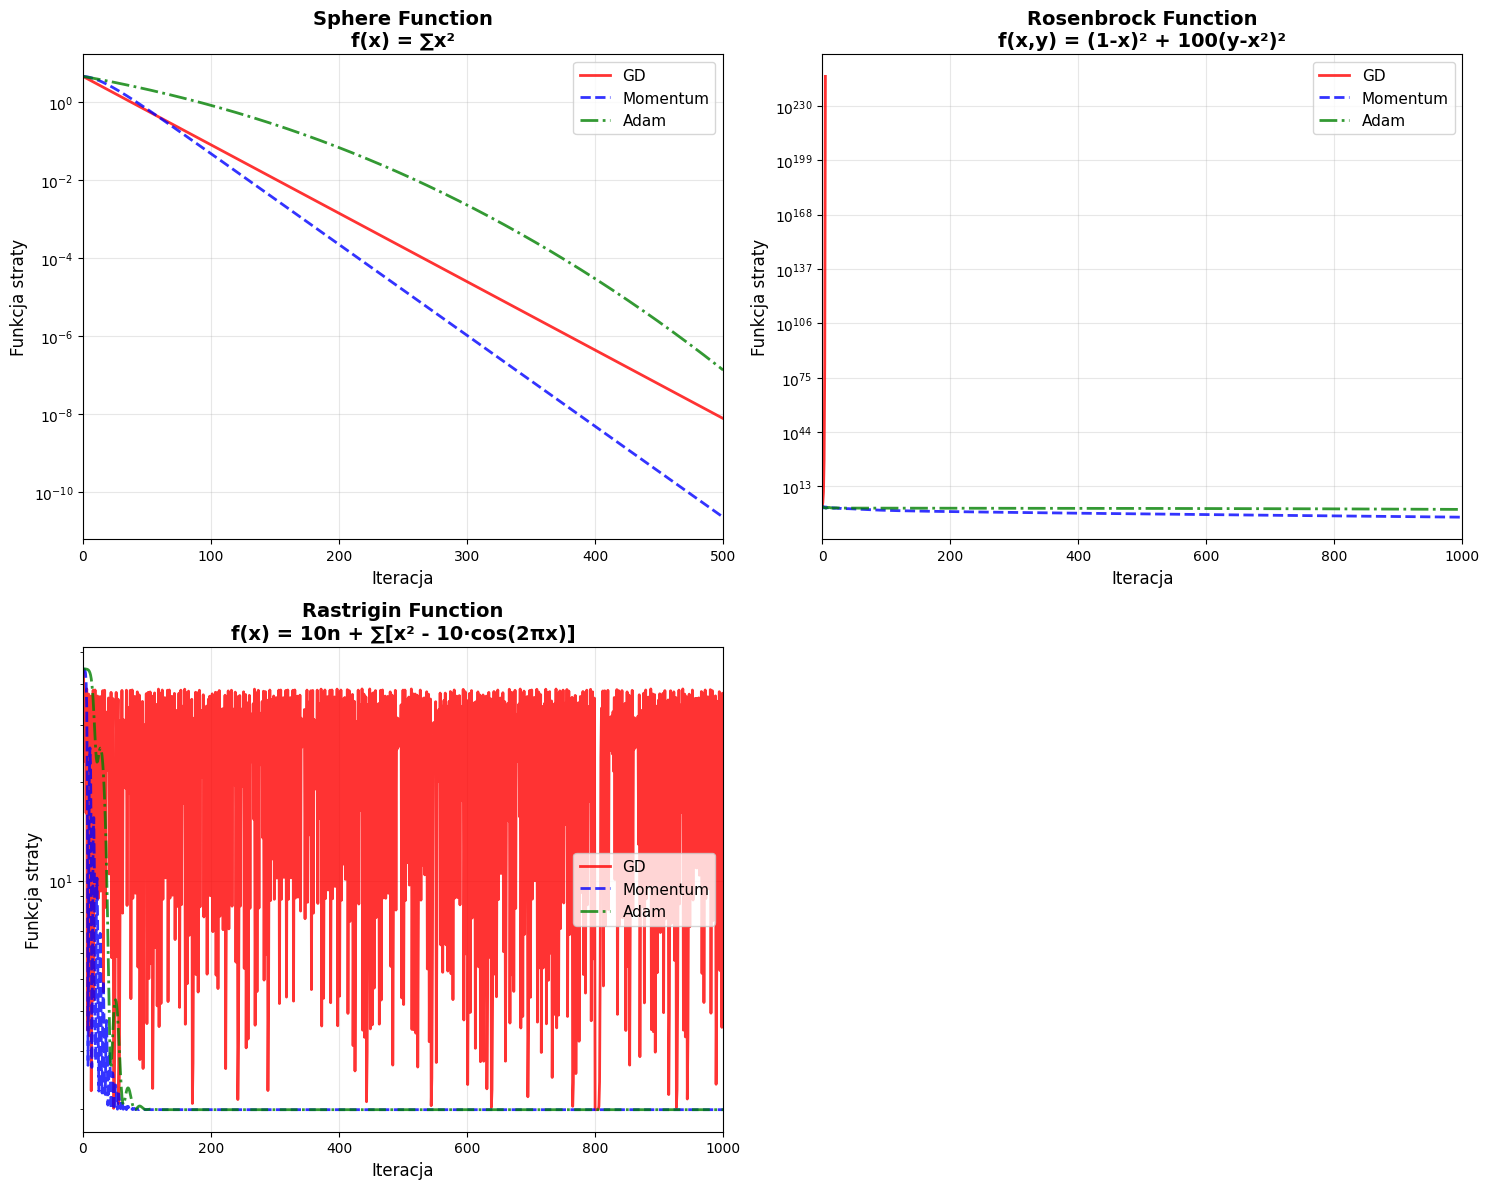

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class Optimizer:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def update(self, params, grads):
        raise NotImplementedError

class GradientDescent(Optimizer):
    def __init__(self, learning_rate=0.01):
        super().__init__(learning_rate)
    
    def update(self, params, grads):
        return params - self.learning_rate * grads

class Momentum(Optimizer):
    def __init__(self, learning_rate=0.01, beta=0.9):
        super().__init__(learning_rate)
        self.beta = beta
        self.velocity = None
    
    def update(self, params, grads):
        if self.velocity is None:
            self.velocity = np.zeros_like(params)
        
        self.velocity = self.beta * self.velocity + (1 - self.beta) * grads
        return params - self.learning_rate * self.velocity

class Adam(Optimizer):
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        ??
    
    def update(self, params, grads):
        ??

class TestFunctions:
    @staticmethod
    def sphere(x):
        """Sphere function: f(x) = sum(x^2)"""
        return np.sum(x ** 2)
    
    @staticmethod
    def sphere_grad(x):
        return 2 * x
    
    @staticmethod
    def rosenbrock(x):
        """Rosenbrock function: f(x,y) = (1-x)^2 + 100(y-x^2)^2"""
        if len(x) != 2:
            raise ValueError("Rosenbrock function requires 2D input")
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
    
    @staticmethod
    def rosenbrock_grad(x):
        if len(x) != 2:
            raise ValueError("Rosenbrock function requires 2D input")
        df_dx = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
        df_dy = 200 * (x[1] - x[0]**2)
        return np.array([df_dx, df_dy])
    
    @staticmethod
    def rastrigin(x):
        """Rastrigin function: f(x) = 10n + sum[x^2 - 10*cos(2πx)]"""
        n = len(x)
        return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))
    
    @staticmethod
    def rastrigin_grad(x):
        return 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)


def run_optimization(optimizer, objective_func, grad_func, initial_params, n_iter=1000):
    """Uruchamia optymalizację i zwraca historię funkcji straty"""
    params = initial_params.copy()
    loss_history = [objective_func(params)]
    
    for i in range(n_iter):
        grads = grad_func(params)
        params = optimizer.update(params, grads)
        loss_history.append(objective_func(params))
    
    return loss_history




plt.figure(figsize=(15, 12))

# Test 1: Sphere Function
plt.subplot(2, 2, 1)
initial_params = np.array([1.5, -1.5])

optimizers = {
    'GD': GradientDescent(learning_rate=0.01),
    'Momentum': Momentum(learning_rate=0.01, beta=0.9),
    'Adam': Adam(learning_rate=0.01, beta1=0.9, beta2=0.999)
}

colors = {'GD': 'red', 'Momentum': 'blue', 'Adam': 'green'}
linestyles = {'GD': '-', 'Momentum': '--', 'Adam': '-.'}

for name, optimizer in optimizers.items():
    loss_history = run_optimization(
        optimizer, TestFunctions.sphere, TestFunctions.sphere_grad,
        initial_params, n_iter=500
    )
    plt.plot(loss_history, label=name, color=colors[name], 
            linestyle=linestyles[name], linewidth=2, alpha=0.8)

plt.title('Sphere Function\nf(x) = ∑x²', fontsize=14, fontweight='bold')
plt.xlabel('Iteracja', fontsize=12)
plt.ylabel('Funkcja straty', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xlim(0, 500)

# Test 2: Rosenbrock Function
plt.subplot(2, 2, 2)
initial_params = np.array([-1.0, 1.5])

for name, optimizer in optimizers.items():
    loss_history = run_optimization(
        optimizer, TestFunctions.rosenbrock, TestFunctions.rosenbrock_grad,
        initial_params, n_iter=1000
    )
    plt.plot(loss_history, label=name, color=colors[name], 
            linestyle=linestyles[name], linewidth=2, alpha=0.8)

plt.title('Rosenbrock Function\nf(x,y) = (1-x)² + 100(y-x²)²', fontsize=14, fontweight='bold')
plt.xlabel('Iteracja', fontsize=12)
plt.ylabel('Funkcja straty', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xlim(0, 1000)

# Test 3: Rastrigin Function
plt.subplot(2, 2, 3)
initial_params = np.array([1.5, -1.5])

for name, optimizer in optimizers.items():
    loss_history = run_optimization(
        optimizer, TestFunctions.rastrigin, TestFunctions.rastrigin_grad,
        initial_params, n_iter=1000
    )
    plt.plot(loss_history, label=name, color=colors[name], 
            linestyle=linestyles[name], linewidth=2, alpha=0.8)

plt.title('Rastrigin Function\nf(x) = 10n + ∑[x² - 10·cos(2πx)]', fontsize=14, fontweight='bold')
plt.xlabel('Iteracja', fontsize=12)
plt.ylabel('Funkcja straty', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xlim(0, 1000)

plt.tight_layout()
plt.show()